# Detector de Sem√°foros usando Segmentaci√≥n por Color

Este notebook implementa un detector de sem√°foros que utiliza segmentaci√≥n por color HSV para identificar las luces rojas, amarillas y verdes, y determinar autom√°ticamente el estado del sem√°foro.

## Objetivos:
- Detectar luces rojas, amarillas y verdes por separado
- Determinar el estado del sem√°foro autom√°ticamente
- Bonus: Conteo de p√≠xeles para determinar si la luz est√° encendida o apagada

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Configuraci√≥n para mostrar im√°genes en el notebook
%matplotlib inline

## Paso 1: Cargar la imagen del sem√°foro

Cargamos la imagen proporcionada y la convertimos al espacio de color HSV para la segmentaci√≥n.

Imagen cargada exitosamente. Dimensiones: (183, 275, 3)


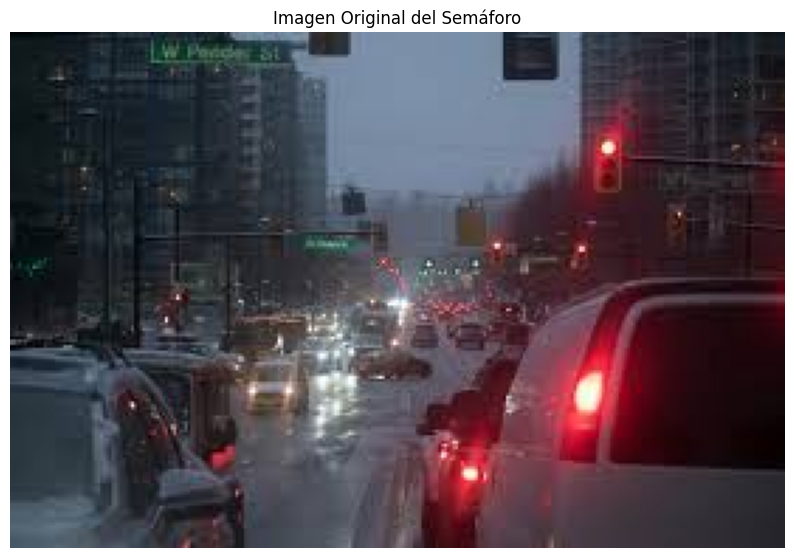

In [2]:
# Cargar la imagen del sem√°foro
imagen_bgr = cv2.imread('images.jpg')

if imagen_bgr is None:
    print("Error: No se pudo cargar la imagen. Verifica que el archivo 'images.jpg' exista.")
    exit()

# Convertir de BGR a RGB para visualizaci√≥n correcta con matplotlib
imagen_rgb = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2RGB)

# Convertir a HSV para segmentaci√≥n por color
imagen_hsv = cv2.cvtColor(imagen_rgb, cv2.COLOR_RGB2HSV)

print(f"Imagen cargada exitosamente. Dimensiones: {imagen_rgb.shape}")

# Mostrar la imagen original
plt.figure(figsize=(10, 8))
plt.imshow(imagen_rgb)
plt.title('Imagen Original del Sem√°foro')
plt.axis('off')
plt.show()

## Paso 2: Definir rangos HSV para las luces del sem√°foro

Definimos los rangos HSV para detectar:
- **Rojo**: Dos rangos debido a la circularidad del espacio HSV
- **Amarillo**: Rango √∫nico
- **Verde**: Rango √∫nico

Los valores est√°n ajustados para luces de sem√°foro t√≠picas.

In [3]:
# Rangos HSV para las luces del sem√°foro

# ROJO - Dos rangos debido a la circularidad del espacio HSV
# Rango 1: Rojo inicial (0-10 grados)
rojo_bajo_1 = np.array([0, 100, 100])      # H: 0-10, S: alta saturaci√≥n, V: brillo m√≠nimo
rojo_alto_1 = np.array([10, 255, 255])     # H: m√°ximo del primer rango

# Rango 2: Rojo final (170-180 grados)
rojo_bajo_2 = np.array([170, 100, 100])    # H: 170-180, mismos S y V
rojo_alto_2 = np.array([180, 255, 255])

# AMARILLO
amarillo_bajo = np.array([20, 100, 100])   # H: alrededor de 30 grados para amarillo
amarillo_alto = np.array([40, 255, 255])

# VERDE
verde_bajo = np.array([40, 50, 50])        # H: alrededor de 60 grados para verde
verde_alto = np.array([80, 255, 255])

print("Rangos HSV definidos para la detecci√≥n de sem√°foros:")
print(f"Rojo 1: {rojo_bajo_1} - {rojo_alto_1}")
print(f"Rojo 2: {rojo_bajo_2} - {rojo_alto_2}")
print(f"Amarillo: {amarillo_bajo} - {amarillo_alto}")
print(f"Verde: {verde_bajo} - {verde_alto}")

Rangos HSV definidos para la detecci√≥n de sem√°foros:
Rojo 1: [  0 100 100] - [ 10 255 255]
Rojo 2: [170 100 100] - [180 255 255]
Amarillo: [ 20 100 100] - [ 40 255 255]
Verde: [40 50 50] - [ 80 255 255]


## Paso 3: Crear m√°scaras de segmentaci√≥n

Creamos m√°scaras binarias para cada color usando `cv2.inRange()`.

In [4]:
# Crear m√°scaras para cada color

# M√°scaras para rojo (combinar ambos rangos)
mascara_roja_1 = cv2.inRange(imagen_hsv, rojo_bajo_1, rojo_alto_1)
mascara_roja_2 = cv2.inRange(imagen_hsv, rojo_bajo_2, rojo_alto_2)
mascara_roja = cv2.bitwise_or(mascara_roja_1, mascara_roja_2)

# M√°scara para amarillo
mascara_amarilla = cv2.inRange(imagen_hsv, amarillo_bajo, amarillo_alto)

# M√°scara para verde
mascara_verde = cv2.inRange(imagen_hsv, verde_bajo, verde_alto)

print("M√°scaras de segmentaci√≥n creadas exitosamente")

M√°scaras de segmentaci√≥n creadas exitosamente


## Paso 4: Aplicar las m√°scaras y contar p√≠xeles

Aplicamos las m√°scaras a la imagen original y contamos los p√≠xeles detectados para determinar si cada luz est√° encendida.

In [5]:
# Funci√≥n para contar p√≠xeles y determinar si la luz est√° encendida
def analizar_luz(mascara, nombre_color, umbral_minimo=50):
    """
    Analiza una m√°scara para determinar si la luz correspondiente est√° encendida.
    
    Par√°metros:
    - mascara: M√°scara binaria del color
    - nombre_color: Nombre del color para mostrar en resultados
    - umbral_minimo: N√∫mero m√≠nimo de p√≠xeles para considerar la luz encendida
    
    Retorna:
    - encendida: True si la luz est√° encendida
    - pixeles_detectados: N√∫mero de p√≠xeles detectados
    - imagen_segmentada: Imagen con solo el color detectado
    """
    # Contar p√≠xeles blancos (255) en la m√°scara
    pixeles_detectados = cv2.countNonZero(mascara)
    
    # Determinar si est√° encendida basado en el umbral
    encendida = pixeles_detectados > umbral_minimo
    
    # Crear imagen segmentada
    imagen_segmentada = cv2.bitwise_and(imagen_rgb, imagen_rgb, mask=mascara)
    
    print(f"{nombre_color}: {pixeles_detectados} p√≠xeles detectados - {'ENCENDIDA' if encendida else 'APAGADA'}")
    
    return encendida, pixeles_detectados, imagen_segmentada

# Analizar cada luz del sem√°foro
print("\n=== AN√ÅLISIS DE LAS LUCES DEL SEM√ÅFORO ===\n")

rojo_encendido, rojo_pixeles, imagen_roja = analizar_luz(mascara_roja, "LUZ ROJA")
amarillo_encendido, amarillo_pixeles, imagen_amarilla = analizar_luz(mascara_amarilla, "LUZ AMARILLA")
verde_encendido, verde_pixeles, imagen_verde = analizar_luz(mascara_verde, "LUZ VERDE")


=== AN√ÅLISIS DE LAS LUCES DEL SEM√ÅFORO ===

LUZ ROJA: 3366 p√≠xeles detectados - ENCENDIDA
LUZ AMARILLA: 0 p√≠xeles detectados - APAGADA
LUZ VERDE: 189 p√≠xeles detectados - ENCENDIDA


## Paso 5: Determinar el estado del sem√°foro

Basado en las luces detectadas, determinamos el estado actual del sem√°foro.

In [6]:
# Determinar el estado del sem√°foro
def determinar_estado_semaforo(rojo, amarillo, verde):
    """
    Determina el estado del sem√°foro basado en las luces encendidas.
    
    Par√°metros:
    - rojo, amarillo, verde: Booleanos indicando si cada luz est√° encendida
    
    Retorna:
    - estado: String con el estado del sem√°foro
    """
    if rojo and not amarillo and not verde:
        return "üö´ DETENTE - Sem√°foro en ROJO"
    elif not rojo and amarillo and not verde:
        return "‚ö†Ô∏è  PRECAUCI√ìN - Sem√°foro en AMARILLO"
    elif not rojo and not amarillo and verde:
        return "‚úÖ AVANZA - Sem√°foro en VERDE"
    elif rojo and amarillo and not verde:
        return "üö´ DETENTE - Sem√°foro en ROJO/AMARILLO (preparaci√≥n para verde)"
    elif not rojo and not amarillo and not verde:
        return "‚ùì ESTADO DESCONOCIDO - Ninguna luz detectada claramente"
    else:
        return "‚ùì ESTADO DESCONOCIDO - Combinaci√≥n inusual de luces"

# Determinar y mostrar el estado
estado_semaforo = determinar_estado_semaforo(rojo_encendido, amarillo_encendido, verde_encendido)

print("\n" + "="*50)
print("üéØ RESULTADO FINAL DEL AN√ÅLISIS")
print("="*50)
print(f"\n{estado_semaforo}")
print("\nüìä Resumen de detecci√≥n:")
print(f"   üî¥ Rojo: {'ON' if rojo_encendido else 'OFF'} ({rojo_pixeles} p√≠xeles)")
print(f"   üü° Amarillo: {'ON' if amarillo_encendido else 'OFF'} ({amarillo_pixeles} p√≠xeles)")
print(f"   üü¢ Verde: {'ON' if verde_encendido else 'OFF'} ({verde_pixeles} p√≠xeles)")


üéØ RESULTADO FINAL DEL AN√ÅLISIS

‚ùì ESTADO DESCONOCIDO - Combinaci√≥n inusual de luces

üìä Resumen de detecci√≥n:
   üî¥ Rojo: ON (3366 p√≠xeles)
   üü° Amarillo: OFF (0 p√≠xeles)
   üü¢ Verde: ON (189 p√≠xeles)


## Paso 6: Visualizaci√≥n de resultados

Mostramos las im√°genes segmentadas y las m√°scaras para verificar la detecci√≥n.

C:\Users\jordi\AppData\Local\Temp\ipykernel_18960\1768585559.py:74: UserWarning: Glyph 10067 (\N{BLACK QUESTION MARK ORNAMENT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\jordi\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 10067 (\N{BLACK QUESTION MARK ORNAMENT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


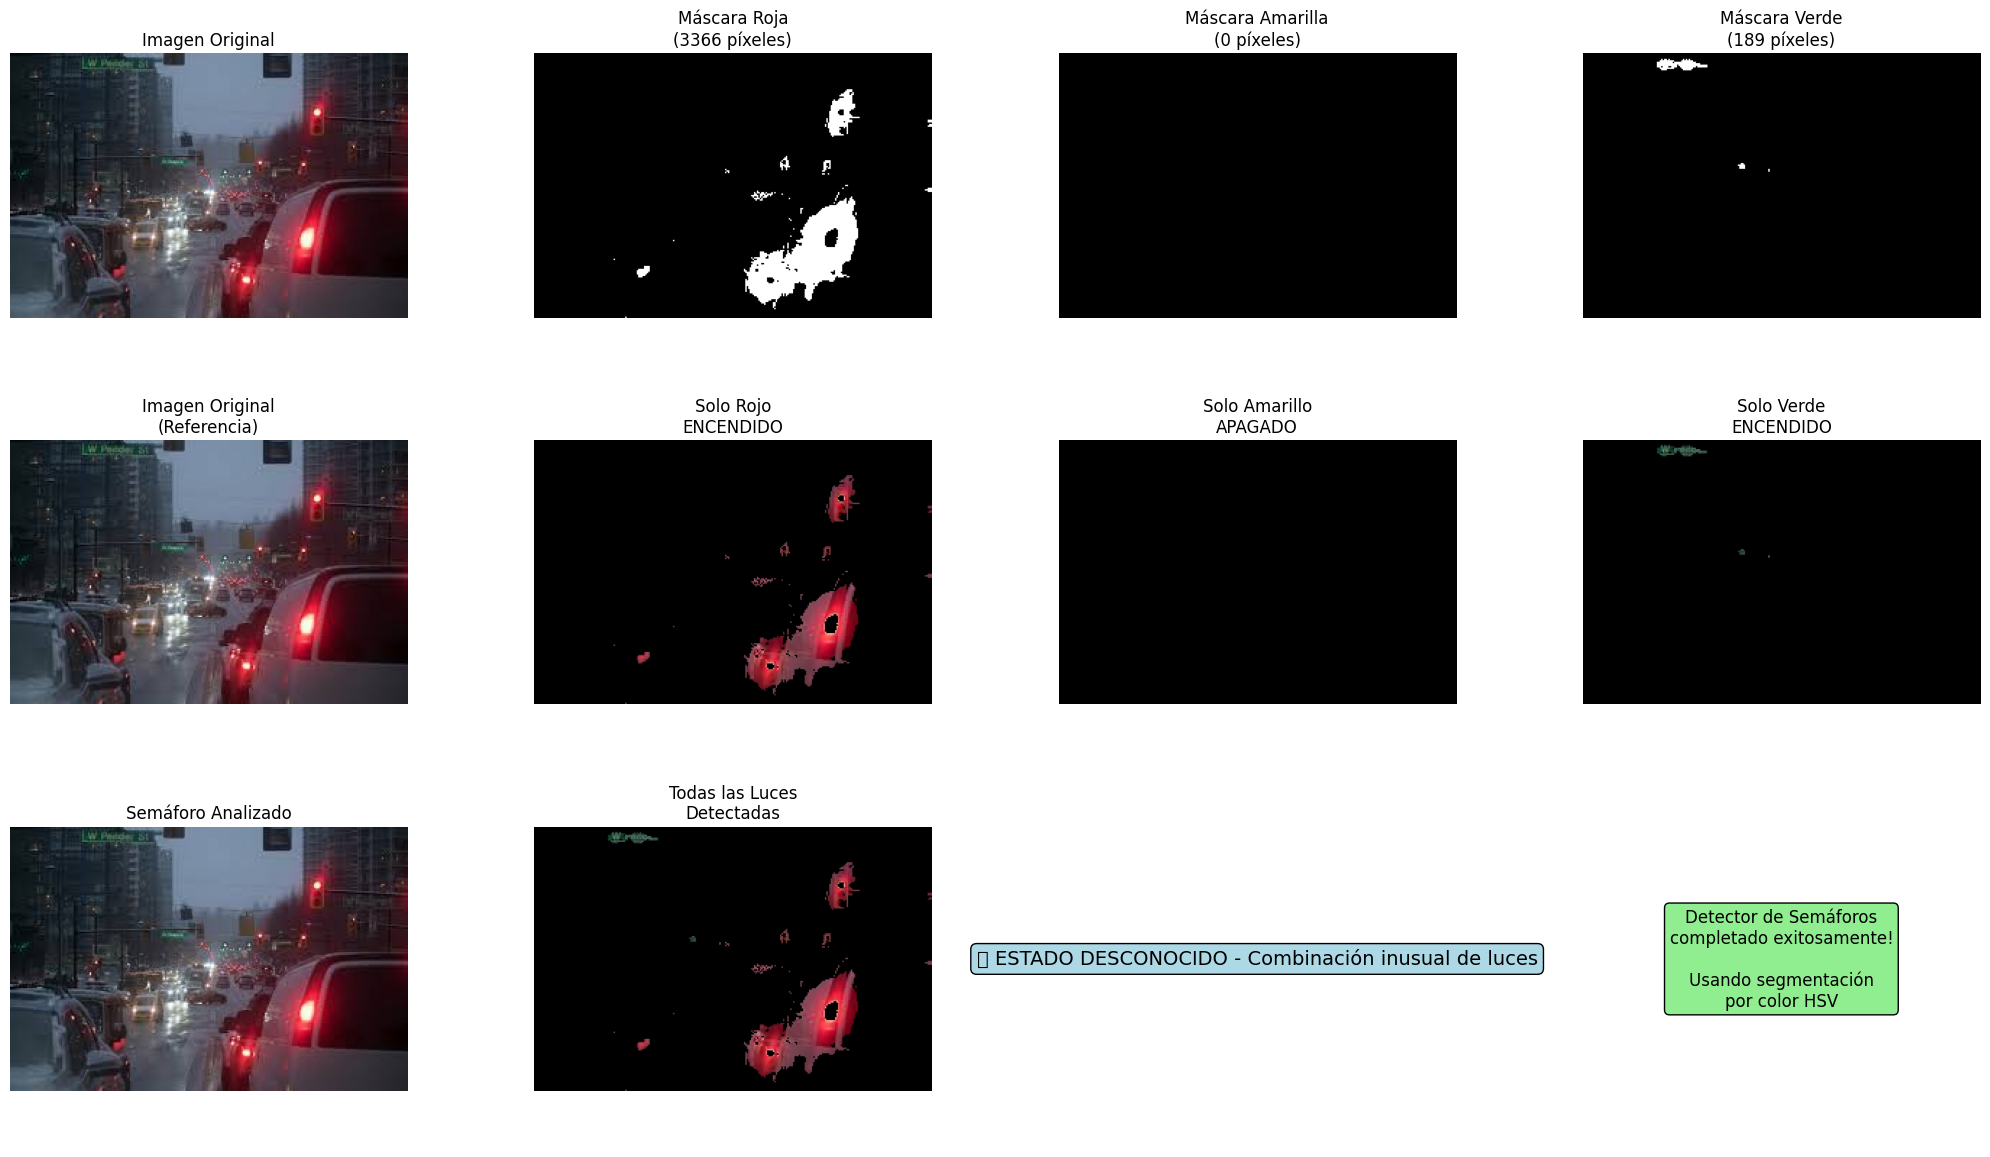


‚úÖ DETECTOR DE SEM√ÅFOROS COMPLETADO EXITOSAMENTE

üéØ El sistema ha analizado la imagen y determinado el estado del sem√°foro
üîç usando segmentaci√≥n por color HSV y conteo de p√≠xeles.

üí° Este detector puede ser extendido para:
   ‚Ä¢ Procesamiento de video en tiempo real
   ‚Ä¢ Integraci√≥n con sistemas de veh√≠culos aut√≥nomos
   ‚Ä¢ Detecci√≥n de m√∫ltiples sem√°foros en una escena
   ‚Ä¢ Mejora de precisi√≥n con machine learning


In [7]:
# Crear visualizaci√≥n completa de resultados
plt.figure(figsize=(20, 12))

# Fila 1: Imagen original y m√°scaras
plt.subplot(3, 4, 1)
plt.imshow(imagen_rgb)
plt.title('Imagen Original', fontsize=12)
plt.axis('off')

plt.subplot(3, 4, 2)
plt.imshow(mascara_roja, cmap='gray')
plt.title(f'M√°scara Roja\n({rojo_pixeles} p√≠xeles)', fontsize=12)
plt.axis('off')

plt.subplot(3, 4, 3)
plt.imshow(mascara_amarilla, cmap='gray')
plt.title(f'M√°scara Amarilla\n({amarillo_pixeles} p√≠xeles)', fontsize=12)
plt.axis('off')

plt.subplot(3, 4, 4)
plt.imshow(mascara_verde, cmap='gray')
plt.title(f'M√°scara Verde\n({verde_pixeles} p√≠xeles)', fontsize=12)
plt.axis('off')

# Fila 2: Im√°genes segmentadas
plt.subplot(3, 4, 5)
plt.imshow(imagen_rgb)
plt.title('Imagen Original\n(Referencia)', fontsize=12)
plt.axis('off')

plt.subplot(3, 4, 6)
plt.imshow(imagen_roja)
plt.title(f'Solo Rojo\n{"ENCENDIDO" if rojo_encendido else "APAGADO"}', fontsize=12)
plt.axis('off')

plt.subplot(3, 4, 7)
plt.imshow(imagen_amarilla)
plt.title(f'Solo Amarillo\n{"ENCENDIDO" if amarillo_encendido else "APAGADO"}', fontsize=12)
plt.axis('off')

plt.subplot(3, 4, 8)
plt.imshow(imagen_verde)
plt.title(f'Solo Verde\n{"ENCENDIDO" if verde_encendido else "APAGADO"}', fontsize=12)
plt.axis('off')

# Fila 3: Resultado final con estado del sem√°foro
plt.subplot(3, 4, 9)
plt.imshow(imagen_rgb)
plt.title('Sem√°foro Analizado', fontsize=12)
plt.axis('off')

# Crear una imagen combinada de todas las detecciones
mascara_combinada = cv2.bitwise_or(cv2.bitwise_or(mascara_roja, mascara_amarilla), mascara_verde)
imagen_combinada = cv2.bitwise_and(imagen_rgb, imagen_rgb, mask=mascara_combinada)

plt.subplot(3, 4, 10)
plt.imshow(imagen_combinada)
plt.title('Todas las Luces\nDetectadas', fontsize=12)
plt.axis('off')

# Espacios vac√≠os para completar el grid
plt.subplot(3, 4, 11)
plt.text(0.5, 0.5, f"{estado_semaforo}", 
         ha='center', va='center', fontsize=14, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))
plt.axis('off')

plt.subplot(3, 4, 12)
plt.text(0.5, 0.5, "Detector de Sem√°foros\ncompletado exitosamente!\n\nUsando segmentaci√≥n\npor color HSV", 
         ha='center', va='center', fontsize=12, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen"))
plt.axis('off')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("‚úÖ DETECTOR DE SEM√ÅFOROS COMPLETADO EXITOSAMENTE")
print("="*60)
print("\nüéØ El sistema ha analizado la imagen y determinado el estado del sem√°foro")
print("üîç usando segmentaci√≥n por color HSV y conteo de p√≠xeles.")
print("\nüí° Este detector puede ser extendido para:")
print("   ‚Ä¢ Procesamiento de video en tiempo real")
print("   ‚Ä¢ Integraci√≥n con sistemas de veh√≠culos aut√≥nomos")
print("   ‚Ä¢ Detecci√≥n de m√∫ltiples sem√°foros en una escena")
print("   ‚Ä¢ Mejora de precisi√≥n con machine learning")